# Breast Cancer detection

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.optimizers import *
from keras.preprocessing.image import *
from keras.applications.resnet50 import ResNet50,preprocess_input
from keras.applications.inception_v3 import InceptionV3,preprocess_input
from keras.applications.inception_resnet_v2 import InceptionResNetV2, preprocess_input
import os
import shutil
plt.style.use('seaborn')

Using TensorFlow backend.


## Visualizing 10 Images From Malignant And Benign Class Of Training Dataset

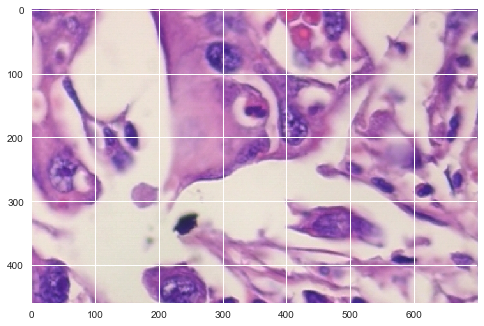

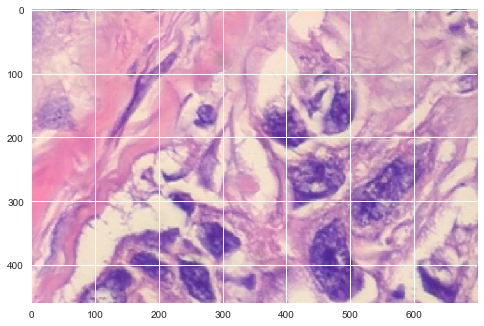

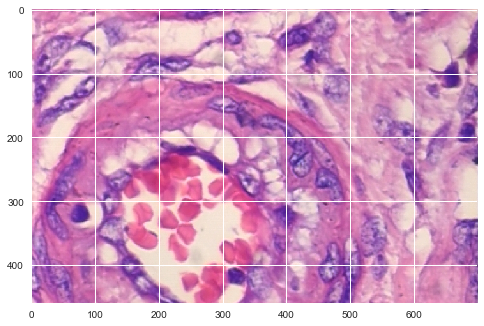

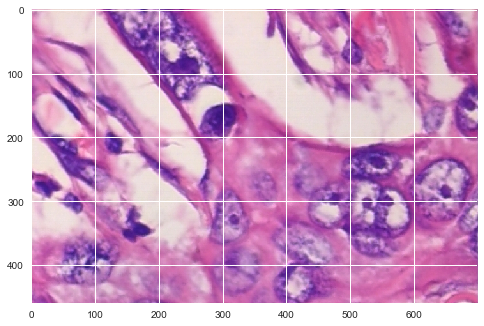

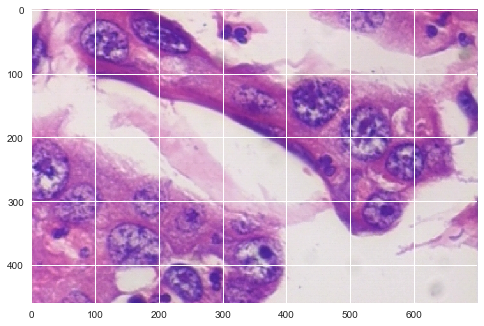

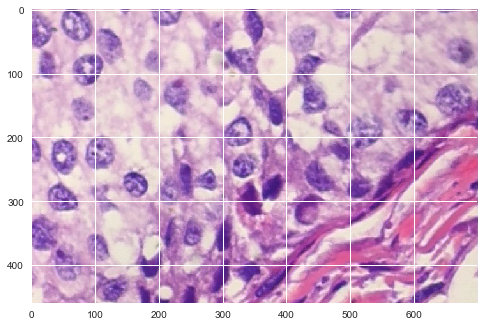

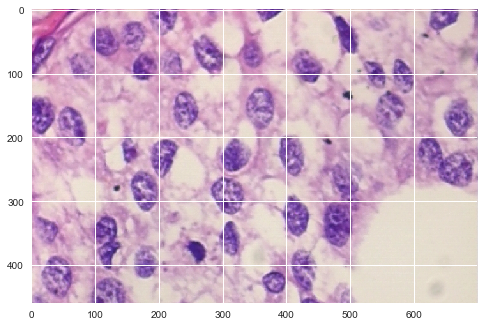

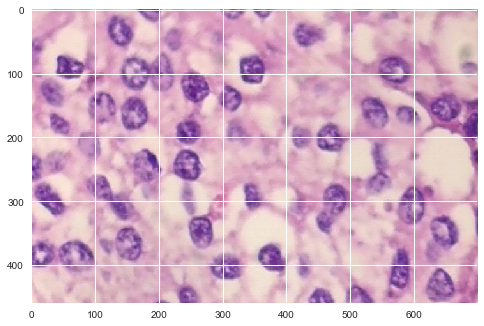

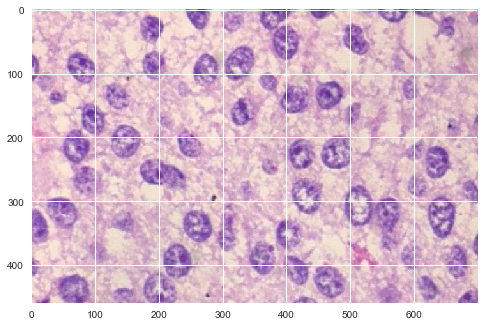

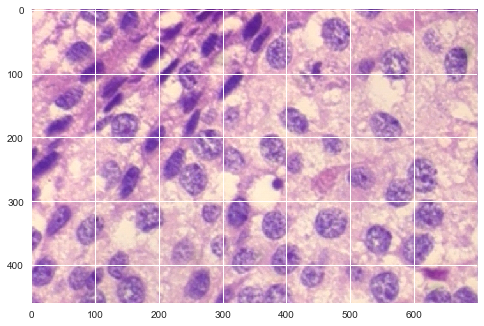

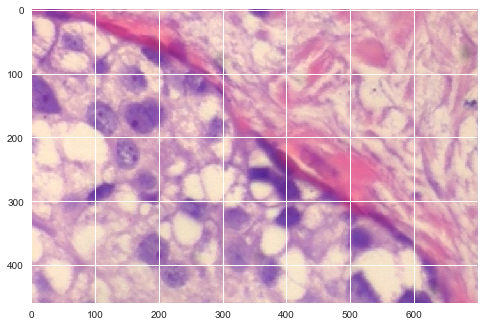

In [2]:
#Malignant
malignant=os.listdir('BreaKHis 400X/train/malignant/')
for idx,mal in enumerate(malignant):
    path=os.path.join('BreaKHis 400X/train/malignant/',mal)
    img=plt.imread(path)
    plt.imshow(img)
    plt.show()
    if idx==10:
        break

In [4]:
from pydataset import data
# Check out datasets
data()

initiated datasets repo at: C:\Users\Cromsa\.pydataset/


dataset_id                                             title
0    AirPassengers       Monthly Airline Passenger Numbers 1949-1960
1          BJsales                 Sales Data with Leading Indicator
2              BOD                         Biochemical Oxygen Demand
3     Formaldehyde                     Determination of Formaldehyde
4     HairEyeColor         Hair and Eye Color of Statistics Students
..             ...                                               ...
752        VerbAgg                  Verbal Aggression item responses
753           cake                 Breakage Angle of Chocolate Cakes
754           cbpp                 Contagious bovine pleuropneumonia
755    grouseticks  Data on red grouse ticks from Elston et al. 2001
756     sleepstudy       Reaction times in a sleep deprivation study

[757 rows x 2 columns]

In [5]:
import os
     
# Get the current working
# directory (CWD)
cwd = os.getcwd()
     
# Print the current working
# directory (CWD)
print("Current working directory:", cwd)

Current working directory: C:\Users\Cromsa\AppData\Local\Programs\Python\Python38-32\Scripts\BreastCancerClassification


In [15]:
import os
result = os.path.exists("") #giving the name of the file as a parameter.
 
print(result)


Files and directories in ' / ' :
['$AV_ASW', '$Recycle.Bin', 'Boot', 'bootmgr', 'BOOTNXT', 'BOOTSECT.BAK', 'Documents and Settings', 'hiberfil.sys', 'HP', 'inetpub', 'MSOCache', 'MySQL Datafiles', 'pagefile.sys', 'PerfLogs', 'Program Files', 'Program Files (x86)', 'ProgramData', 'swapfile.sys', 'SWSetup', 'System Volume Information', 'SYSTEM.SAV', 'Users', 'Windows']


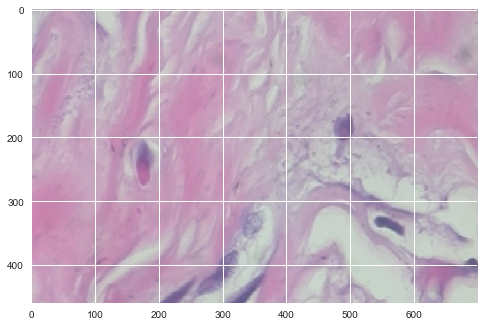

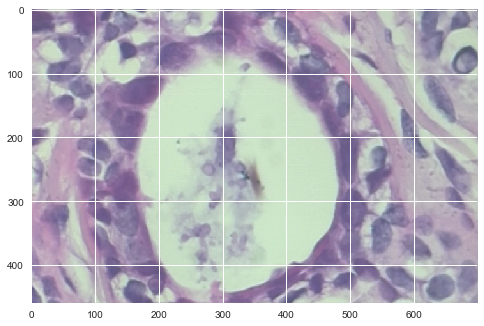

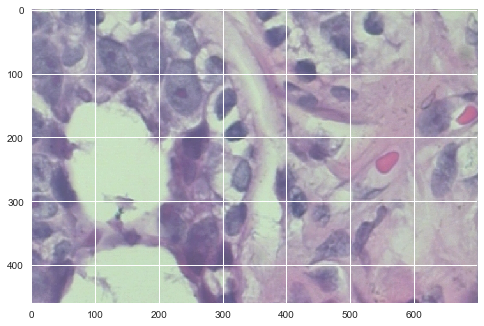

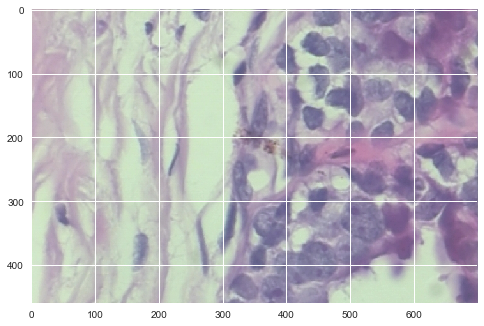

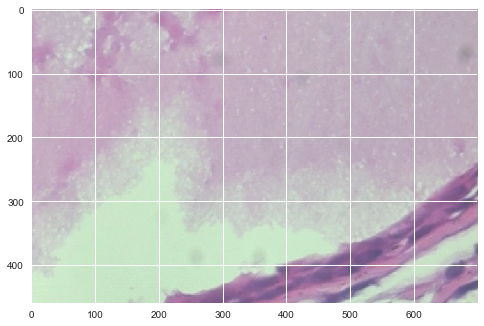

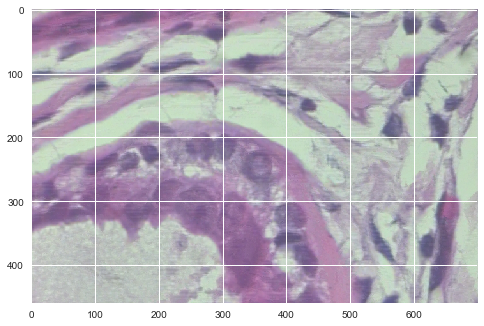

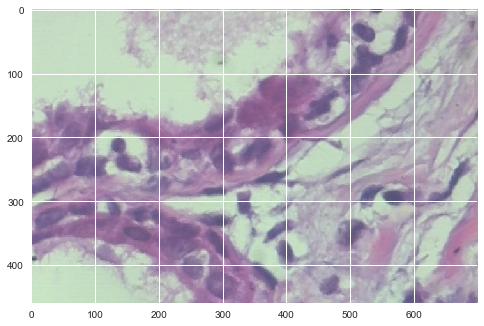

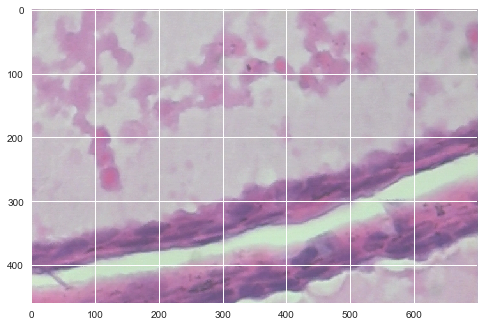

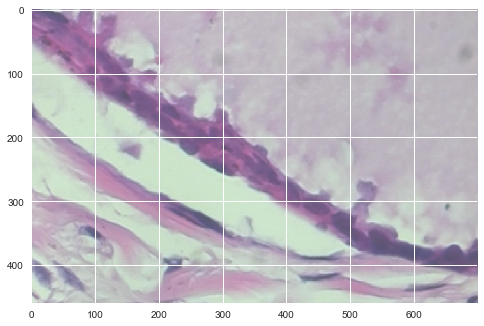

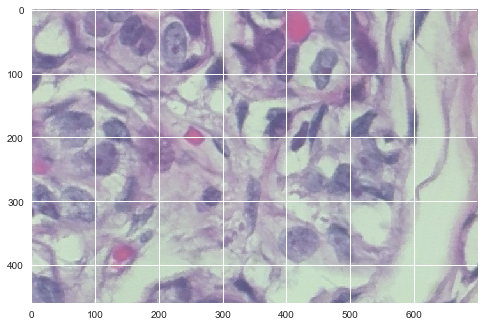

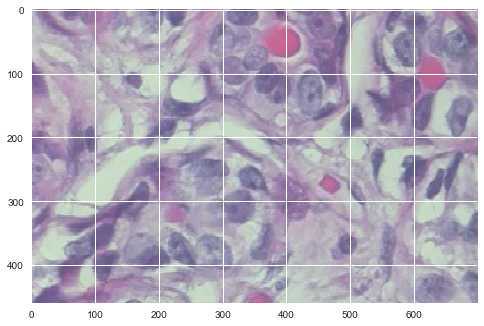

In [3]:
#Benign
benign=os.listdir('BreaKHis 400X/train/benign/')
for idx,ben in enumerate(benign):
    path=os.path.join('BreaKHis 400X/train/benign',ben)
    img=plt.imread(path)
    plt.imshow(img)
    plt.show()
    if idx==10:
        break

## Creating Custom CNN

In [35]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',padding='same',input_shape=(128,128,3)))
model.add(Conv2D(64,(4,4),activation='relu',padding='same'))
model.add(MaxPool2D((2,2)))
model.add(BatchNormalization())
model.add(Conv2D(128,(5,5),activation='relu',padding='same'))
model.add(MaxPool2D((2,2)))
model.add(BatchNormalization())
model.add(Conv2D(512,(3,3),activation='relu',padding='same'))
model.add(MaxPool2D((2,2)))
model.add(BatchNormalization())
model.add(GlobalAveragePooling2D())
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 128, 128, 32)      896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 64)      32832     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 64, 64, 64)        256       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 64, 128)       204928    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 128)       0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 128)      

In [33]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)
                                
train_generator = train_gen.flow_from_directory(
    "BreaKHis 400X/train/",
    target_size = (128,128),
    batch_size = 32,
    class_mode = 'binary'
)
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)
val_generator = val_gen.flow_from_directory(
    "BreaKHis 400X/val/",
    target_size = (128,128),
    batch_size = 32,
    class_mode = 'binary'
)

Found 1148 images belonging to 2 classes.
Found 545 images belonging to 2 classes.


In [20]:
train_generator.class_indices

{'benign': 0, 'malignant': 1}

In [11]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
custom_model=model.fit_generator(train_generator,validation_data=val_generator,epochs=40)

Epoch 1/40
36/36 [==============================] - 50s 1s/step - loss: 0.4030 - accuracy: 0.8519 - val_loss: 0.0789 - val_accuracy: 0.6807
Epoch 2/40
36/36 [==============================] - 43s 1s/step - loss: 0.3626 - accuracy: 0.8449 - val_loss: 0.3288 - val_accuracy: 0.6771
Epoch 3/40
36/36 [==============================] - 99s 3s/step - loss: 0.3158 - accuracy: 0.8720 - val_loss: 0.0043 - val_accuracy: 0.6826
Epoch 4/40
36/36 [==============================] - 108s 3s/step - loss: 0.2900 - accuracy: 0.8807 - val_loss: 0.0084 - val_accuracy: 0.6807
Epoch 5/40
36/36 [==============================] - 94s 3s/step - loss: 0.2857 - accuracy: 0.8763 - val_loss: 0.1078 - val_accuracy: 0.6771
Epoch 6/40
36/36 [==============================] - 73s 2s/step - loss: 0.2846 - accuracy: 0.8728 - val_loss: 0.3819 - val_accuracy: 0.6789
Epoch 7/40
36/36 [==============================] - 82s 2s/step - loss: 0.2660 - accuracy: 0.8815 - val_loss: 0.2565 - val_accuracy: 0.7541
Epoch 8/40
36/36 [=

In [ ]:
custom_model.history??
custom_model.history.key

In [ ]:
import matplotlib.pyplot as plt

plt.plot(custom_model.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend([])

In [13]:
model.save('model_cnn.h5')

In [15]:
custom_model_cnn=pd.DataFrame(custom_model.history)
custom_model_cnn.to_csv('CNNmodel.csv')

# Creating ANN

In [4]:
train_gen = ImageDataGenerator()
                                
train_generator = train_gen.flow_from_directory(
    "BreaKHis 400X/train/",
    target_size = (128,128),
    batch_size = 32,
    class_mode = 'binary'
)
val_gen = ImageDataGenerator()
val_generator = val_gen.flow_from_directory(
    "BreaKHis 400X/val/",
    target_size = (128,128),
    batch_size = 32,
    class_mode = 'binary'
)

Found 1148 images belonging to 2 classes.
Found 545 images belonging to 2 classes.


In [5]:
model2=Sequential()
model2.add(InputLayer(batch_input_shape=(None,128,128,3)))
model2.add(Flatten())
model2.add(Dense(128,activation='relu'))
model2.add(Dense(256,activation='relu'))
model2.add(Dense(512,activation='relu'))
model2.add(Dropout(0.25))
model2.add(Dense(512,activation='relu'))
model2.add(Dropout(0.25))
model2.add(Dense(128,activation='relu'))
model2.add(Dense(64,activation='relu'))
model2.add(Dropout(0.25))
model2.add(Dense(32,activation='relu'))
model2.add(Dense(1,activation='sigmoid'))
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 49152)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               6291584   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_3 (Dense)              (None, 512)               131584    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)              

In [6]:
model2.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
custom_model_ann=model2.fit_generator(train_generator,validation_data=val_generator,epochs=40)

Epoch 1/40
36/36 [==============================] - 46s 1s/step - loss: 146.1203 - accuracy: 0.5732 - val_loss: 1.7615e-08 - val_accuracy: 0.6771
Epoch 2/40
36/36 [==============================] - 40s 1s/step - loss: 2.5006 - accuracy: 0.6324 - val_loss: 0.6652 - val_accuracy: 0.6771
Epoch 3/40
36/36 [==============================] - 40s 1s/step - loss: 0.6720 - accuracy: 0.6768 - val_loss: 0.8248 - val_accuracy: 0.6771
Epoch 4/40
36/36 [==============================] - 39s 1s/step - loss: 0.6454 - accuracy: 0.6768 - val_loss: 0.4683 - val_accuracy: 0.6771
Epoch 5/40
36/36 [==============================] - 39s 1s/step - loss: 0.6317 - accuracy: 0.6768 - val_loss: 0.3873 - val_accuracy: 0.6771
Epoch 6/40
36/36 [==============================] - 40s 1s/step - loss: 0.6333 - accuracy: 0.6768 - val_loss: 1.1098 - val_accuracy: 0.6771
Epoch 7/40
36/36 [==============================] - 41s 1s/step - loss: 0.6290 - accuracy: 0.6768 - val_loss: 1.1349 - val_accuracy: 0.6771
Epoch 8/40
36/

In [7]:
model2.save('model_ann.hdf5')
custom_model_ANN=pd.DataFrame(custom_model_ann.history)
custom_model_ANN.to_csv('ANNmodel.csv')

## Getting the training data and testing data into a list for machine learning models.

In [8]:
image_data=[]
labels=[]
for mal in malignant:
    img=image.load_img(os.path.join('BreaKHis 400X/train/malignant/',mal),target_size=(128,128))
    #img=plt.imread(os.path.join('BreaKHis 400X/train/malignant/',mal))
    
    imagearray=img_to_array(img)
    image_data.append(imagearray)
    labels.append(1)
    
for ben in benign:
    img=image.load_img(os.path.join('BreaKHis 400X/train/benign/',ben),target_size=(128,128))
    #img=plt.imread(os.path.join('BreaKHis 400X/train/benign/',ben))
    imagearray=img_to_array(img)
    image_data.append(imagearray)
    labels.append(0)

X=np.array(image_data)
Y=np.array(labels)
print(X.shape)
print(Y.shape)  



(1148, 128, 128, 3)
(1148,)


In [9]:
X=X.reshape(1148,128*128*3)


In [10]:
#Test Data
image_data_test=[]
labels=[]
for mal in os.listdir('BreaKHis 400X/val/malignant/'):
    img=image.load_img(os.path.join('BreaKHis 400X/val/malignant/',mal),target_size=(128,128))
    #img=plt.imread(os.path.join('BreaKHis 400X/train/malignant/',mal))
    
    imagearray=img_to_array(img)
    image_data_test.append(imagearray)
    labels.append(1)
    
for ben in os.listdir('BreaKHis 400X/val/benign/'):
    img=image.load_img(os.path.join('BreaKHis 400X/val/benign/',ben),target_size=(128,128))
    #img=plt.imread(os.path.join('BreaKHis 400X/train/benign/',ben))
    imagearray=img_to_array(img)
    image_data_test.append(imagearray)
    labels.append(0)

X_test=np.array(image_data_test)
Y_test=np.array(labels)
print(X_test.shape)
print(Y_test.shape)  



(545, 128, 128, 3)
(545,)


In [11]:
X_test=X_test.reshape(545,128*128*3)

## SVM

In [12]:
#Random Forest Classifier
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
svm=SVC(C=0.7,
    kernel='rbf',
    gamma='scale',
    random_state=25)
svm.fit(X,Y)
    

SVC(C=0.7, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=25, shrinking=True, tol=0.001,
    verbose=False)

In [13]:
svm.score(X_test,Y_test)

0.8477064220183487

## Naive Bayes

In [1]:
from sklearn.naive_bayes import BernoulliNB
nb=BernoulliNB(alpha=0.8)
nb.fit(X,Y)


NameError: name 'X' is not defined

In [15]:
nb.score(X_test,Y_test)

0.6752293577981652

## Random Forest

In [16]:
from sklearn.ensemble import RandomForestClassifier
ref=RandomForestClassifier(n_estimators=135,
    criterion='gini',
    max_depth=None,
    max_features='auto',
    max_leaf_nodes=None,
    bootstrap=True,
    n_jobs=None,
    random_state=25,
)
ref.fit(X,Y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=135,
                       n_jobs=None, oob_score=False, random_state=25, verbose=0,
                       warm_start=False)

In [17]:
ref.score(X_test,Y_test)

0.8403669724770643

## Accuracy

In [18]:
from sklearn.externals import joblib
joblib.dump(ref,"RandomForest.pkl")
joblib.dump(nb,"NaiveBayes.pkl")
joblib.dump(svm,"SVM.pkl")

c:\users\acer\appdata\local\programs\python\python37\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['SVM.pkl']

In [19]:
cnn=load_model('model_cnn.h5')

In [51]:
cnn.evaluate_generator(val_generator)

[0.022894857451319695, 0.8678898811340332]

In [21]:
plot_y=[model2.evaluate_generator(val_generator)[1],cnn.evaluate_generator(val_generator)[1],svm.score(X_test,Y_test),nb.score(X_test,Y_test),ref.score(X_test,Y_test)]

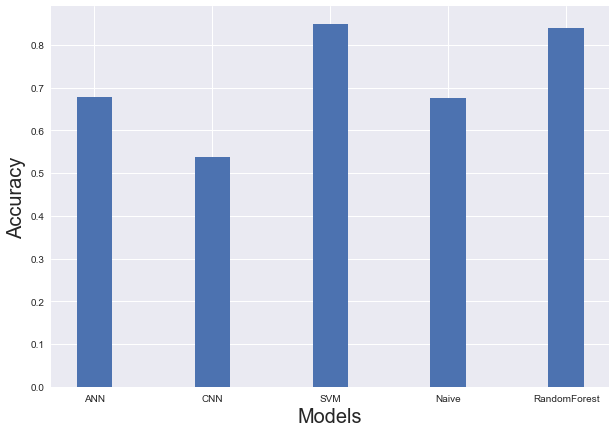

In [34]:
plt.figure(figsize=(10,7))
plt.bar(['ANN','CNN','SVM','Naive','RandomForest'],plot_y,width=0.3)
plt.xlabel('Models',fontsize=20)
plt.ylabel('Accuracy',fontsize=20)
plt.show()
